# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


### Load Data

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

# view count of rows, columns in dataset
print(df.shape)

# preview dataset
print(df.head())
df.tail()


(333, 15)
   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio       b  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


333 rows of data in 15 columns

In [2]:
# checking for any missing values
series_lengths = list(map(lambda s: len(df[s]), df))
series_lengths

df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

No missing values:

### Explore Clentrality and Dispersion

In [3]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [4]:
# calculate minimum and maximum values of select series
print("\nRange of number of rooms:", "min.", round(df['rm'].min(), 3), "-- max.", round(df['rm'].max(), 3))
print(f'Median number of rooms:', round(df['rm'].median(), 2))
print(f'Mean number of rooms:', round(df['rm'].mean(), 2))

print("\nPproportion of pre- 1940 homes:", df['age'].min(), "-- max.", df['age'].max())
print(f'Median proportion of pre- 1940 homes:', round(df['age'].median(), 2))
print(f'Mean proportion of pre- 1940 homes:', round(df['age'].mean(), 2))

print("\nRange of home values:", "min.", df['medv'].min(), "-- max.", df['medv'].max())
print(f'Median home value:', round(df['medv'].median(), 2))
print(f'Mean home value:', round(df['medv'].mean(), 2))


Range of number of rooms: min. 3.561 -- max. 8.725
Median number of rooms: 6.2
Mean number of rooms: 6.27

Pproportion of pre- 1940 homes: 6.0 -- max. 100.0
Median proportion of pre- 1940 homes: 76.7
Mean proportion of pre- 1940 homes: 68.23

Range of home values: min. 5.0 -- max. 50.0
Median home value: 21.6
Mean home value: 22.77


We can observe what seems to be significant variability between the median and mean calculations, in the `age` attribute.

### Create Histogram(s)

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams["font.size"]=14

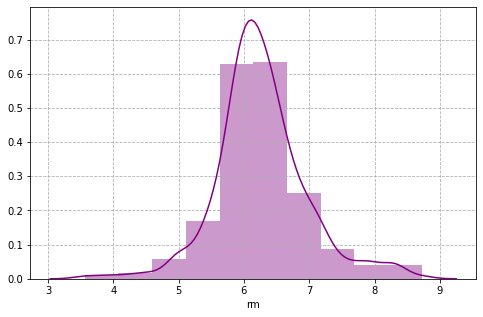

In [6]:
# plot `rm` distribution
x = df['rm']

plt.figure(figsize = (8, 5))
plt.grid(linestyle='dashed', zorder=0)
sns.distplot(x, bins=10, color='purple', norm_hist=True)

plt.show()

`rm` reflects an essentially normal distribution, with only a slight skew to the right.

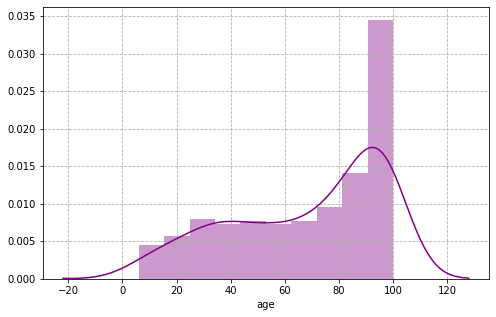

In [7]:
# plot `age` distribution
x = df['age']

plt.figure(figsize = (8, 5))
plt.grid(linestyle='dashed', zorder=0)
sns.distplot(x, bins=10, color='purple', norm_hist=True)

plt.show()

The `age` distribtion is negatively skewed.

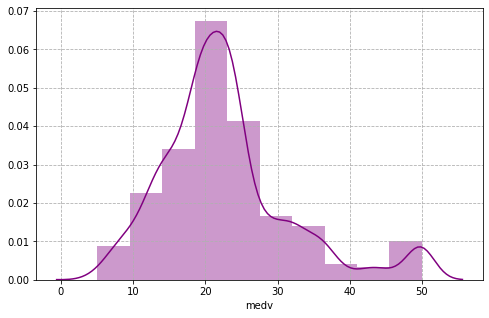

In [8]:
# plot `medv` distribution
x = df['medv']

plt.figure(figsize = (8, 5))
plt.grid(linestyle='dashed', zorder=0)
sns.distplot(x, bins=10, color='purple', norm_hist=True)

plt.show()

This plot shows a positive skew, to the right, for `medv`.

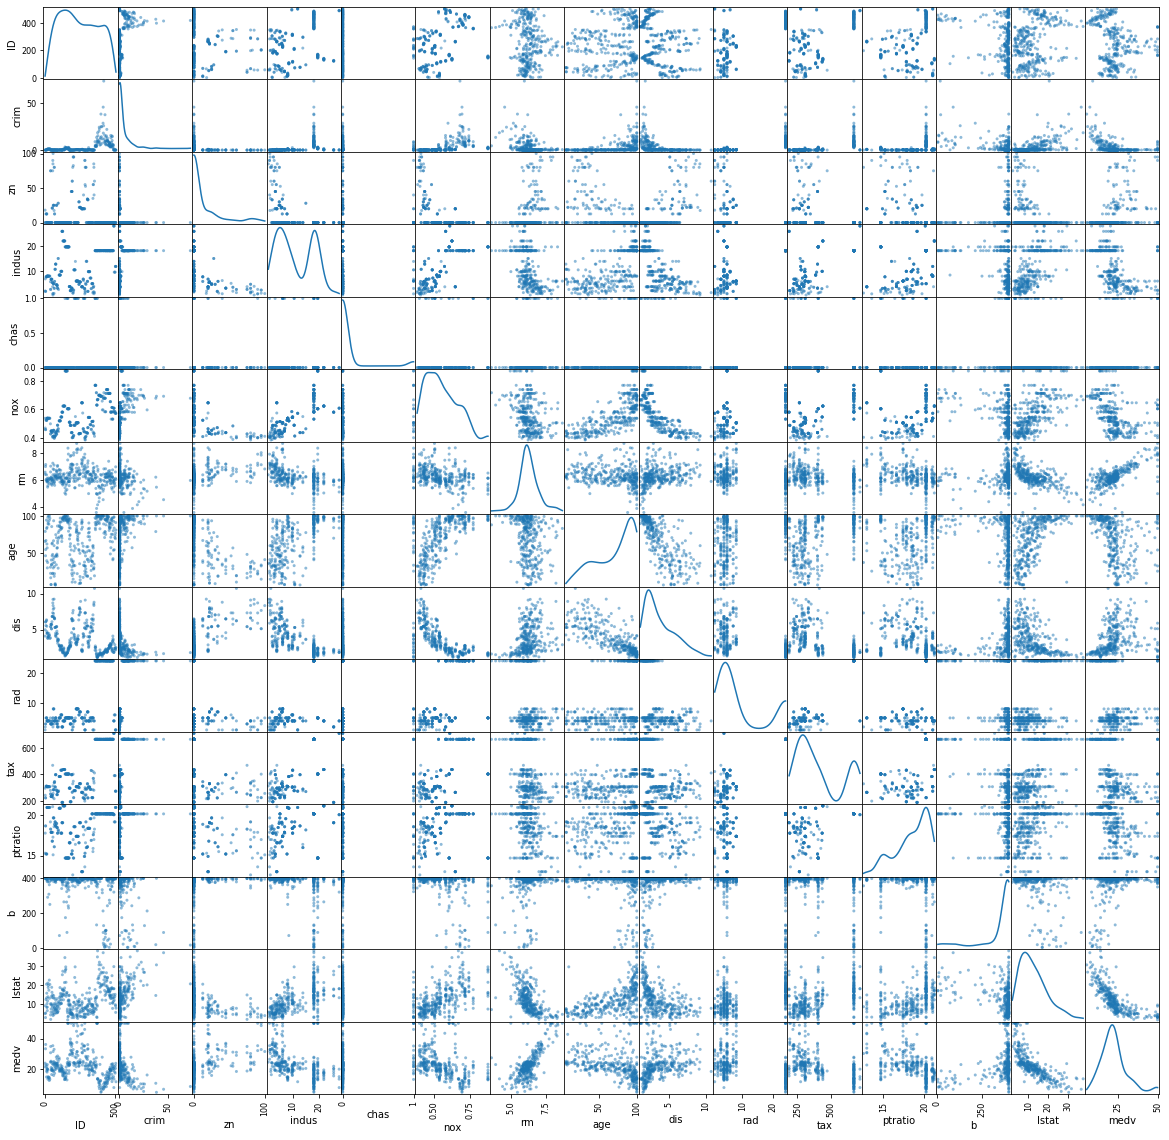

In [9]:
# compare/ visualize correlation between attributes
# use kde to plot density in the diagonal
pd.plotting.scatter_matrix(df, figsize=(20,20), diagonal='kde');
plt.show()

### Create Meaningful Subsets

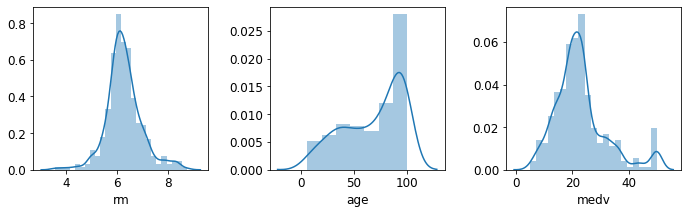

In [22]:
# create a dataset of select series
df_sub_set = df.loc[:,['rm','age','medv']]

matplotlib.rcParams["font.size"]=12
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(8,3))

# bring plots for all series into a single plot
for index, a in enumerate(ax.flatten()):
    column = df_sub_set.columns[index]
    a = sns.distplot(df[column], ax=a)#plt.tight_layout()

# add space between the subplots
plt.subplots_adjust(right=1.25, hspace=0.25,
                    wspace=0.35)
plt.show()

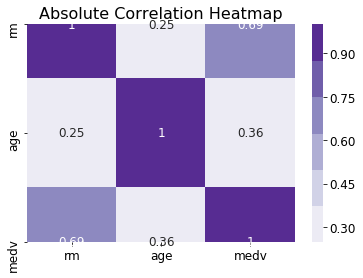

In [37]:
import numpy as np

plt.title("Absolute Correlation Heatmap", fontsize=16)
# plt.show

sns.heatmap(data=np.abs(corr), annot=True, cmap=sns.color_palette('Purples'))
plt.show()

We can note a positive correlation between `rm` and `medv`, vs a negative correlation for `age' and 'medv'.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!